Here we are importing some of the libraries of python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

Reading the data in csv format

In [2]:
df = pd.read_csv('BeerDataScienceProject.csv', engine = 'python')

Getting some information 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [4]:
#Data type looks fine. No change needed.

# 1 Exploratory Data Analysis

Checking top five rows

In [5]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


Here review_time column is in UNIX time format so we need to change it.

Below is Converted column of review_time with dataset. Converted column in excel as it was easier.So now importing new dataset with converted column.

In [6]:
df1=pd.read_excel('BeerDataScienceProject33.xlsx')

Checking head again 

In [7]:
df1.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,Converted review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009-02-16 20:57:03
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009-03-01 13:44:57
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009-03-01 14:10:04
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009-02-15 19:12:25
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010-12-30 18:53:26


In [8]:
#Don't need review_time column as we have new converted time

In [9]:
df1.drop('review_time',axis=1,inplace=True)

In [10]:
df1.shape

(528870, 13)

In [11]:
#528870 rows and 13 columns.

Checking some aggregate functions with describe method

In [12]:
D=df1[['review_overall','review_taste','review_aroma','review_palette','review_appearance']]

In [13]:
D.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
review_overall,528870.0,3.833197,0.709962,0.0,3.5,4.0,4.5,5.0
review_taste,528870.0,3.765993,0.669018,1.0,3.5,4.0,4.0,5.0
review_aroma,528870.0,3.817350,0.718903,1.0,3.5,4.0,4.5,5.0
review_palette,528870.0,3.758926,0.685335,1.0,3.5,4.0,4.0,5.0
review_appearance,528870.0,3.864522,0.604010,0.0,3.5,4.0,4.0,5.0


#     1.1 Detection and Treatment of Null values

In [14]:
df1.isnull().sum()

beer_ABV                 20280
beer_beerId                  0
beer_brewerId                0
beer_name                    0
beer_style                   0
review_appearance            0
review_palette               0
review_overall               0
review_taste                 0
review_profileName         115
review_aroma                 0
review_text                211
Converted review_time        0
dtype: int64

In [15]:
#We can see that we have null values in features like beer_ABV,review_profilename and review_text.

Treatment of Null values in beer_ABV column

Text(0, 0.5, 'Density')

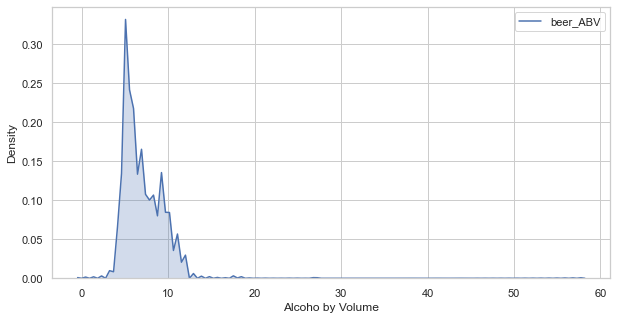

In [16]:
plt.figure(figsize=(10,5))
sns.kdeplot(df1['beer_ABV'],shade=True)
plt.xlabel('Alcoho by Volume')
plt.ylabel('Density')

#Here our data is not symmetrical, it looks left skewed with a big extended tail. so i will be replacing missing values with MEDIAN value.

In [17]:
df1['beer_ABV'].median()

6.5

In [18]:
df1['beer_ABV'].fillna(6.5,inplace=True)

In [19]:
df1['beer_ABV'].isnull().sum()

0

# 1.2 Detection and Treatment of Outliers


There are many methods to detect outliers some of them are as follwing.

1)With Boxplot
     
2)With IQR range
     
3)With Z-Score
     
4)With Scatter Plot


There is no hard and fast rule to select one method but i will use outlier treatment with Z-Score.


In [20]:
mean=np.mean(df1['beer_ABV'])
std=np.std(df1['beer_ABV'])

#Here i have created mean and std objects which give us mean and standard deviation of beer_ABV column

In [21]:
threshold=3
outlier=[]
for i in df1['beer_ABV']:
    z=(i-mean)/std
    if z>threshold:
        outlier.append(i)

In [22]:
len(outlier)

3005

In [23]:
# i have created a function to identify outliers based on Z score

In [24]:
for i in outlier:
    t=len(outlier)/len(df1['beer_ABV'])*100
print('total value of outlier is',t,'%')

total value of outlier is 0.5681925614990451 %


In [25]:
# As above outliers are only 0.56% of beer_ABV column.
# We can either remove outliers or we can replace them

In [28]:
threshold=3
outlier=[]
for i in df1['beer_ABV']:
    z=(i-mean)/std
    if z>threshold:
        df1['beer_ABV'].replace(i,6.5,inplace=True)

In [29]:
len(outlier)

0

In [30]:
# I replaced outliers with the MEDIAN value of beer_ABV column.

In [31]:
outlier1=[]
threshold=3
for i in df1['review_taste']:
    z=(i-mean)/std
    if z>threshold:
        outlier1.append(i)

In [32]:
len(outlier1)

0

In [33]:
#review_taste column does not have outlier

In [34]:
outlier2=[]
threshold=3
for i in df1['review_palette']:
    z=(i-mean)/std
    if z>threshold:
        outlier2.append(i)   

In [35]:
len(outlier2)

0

In [36]:
#review_palette column does not have outlier

In [37]:
outlier3=[]
threshold=3
for i in df1['review_aroma']:
    z=(i-mean)/std
    if z>threshold:
        outlier3.append(i)  

In [38]:
len(outlier3)

0

In [39]:
#review_aroma column does not have outlier

In [40]:
outlier4=[]
threshold=3
for i in df1['review_overall']:
    z=(i-mean)/std
    if z>threshold:
        outlier4.append(i)

In [41]:
len(outlier4)

0

In [42]:
#review_overall column does not have outlier

In [43]:
outlier5=[]
threshold=3
for i in df1['review_appearance']:
    z=(i-mean)/std
    if z>threshold:
        outlier5.append(i)

In [44]:
len(outlier5)

0

In [45]:
#review_appearance column does not have outlier

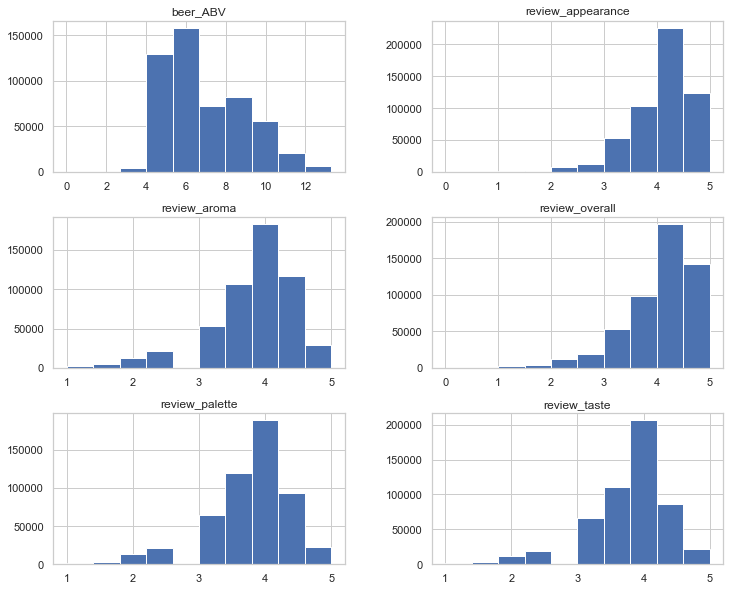

In [46]:
df2=df1.drop(['beer_beerId','beer_brewerId'],axis=1)
df2.hist(figsize=(12,10))
plt.show()

In [47]:
Top10= df1[['beer_name','review_overall']]\
    .pivot_table(index="beer_name", aggfunc=('count'))\
    .dropna()

In [48]:
Top10.sort_values('review_overall',ascending=False)\
  .head(10)

,review_overall
beer_name,
Sierra Nevada Celebration Ale,3000
Sierra Nevada Pale Ale,2587
Founders Breakfast Stout,2502
Sierra Nevada Bigfoot Barleywine Style Ale,2492
La Fin Du Monde,2483
Samuel Adams Boston Lager,2418
Chocolate Stout,2254
Dead Guy Ale,2234
Trappistes Rochefort 10,2170


In [49]:
#top 10 highest rated beer in entire dataset as shown above.

In [50]:
Top5= df1[['review_overall','beer_style']]\
    .pivot_table(index="beer_style", aggfunc=('count'))\
    .dropna()

In [51]:
Top5.sort_values('review_overall',ascending=False)\
  .head(10)

,review_overall
beer_style,
American IPA,43369
American Double / Imperial IPA,26106
American Double / Imperial Stout,23354
American Pale Ale (APA),20520
American Amber / Red Ale,18731
Russian Imperial Stout,17192
American Porter,16601
Belgian Strong Dark Ale,15407
Fruit / Vegetable Beer,15148


In [52]:
# Top 10 highest rated beer style as mentioned above.

# Question 1.	Rank top 3 Breweries which produce the strongest beers?

In [54]:
df[['beer_ABV','beer_brewerId','beer_name']].groupby('beer_ABV').agg('max').tail(10).sort_values(['beer_ABV'],ascending=False)

,beer_brewerId,beer_name
beer_ABV,,
57.70,6513,Schorschbräu Schorschbock 57%
43.00,6513,Schorschbräu Schorschbock 43%
39.44,6513,Schorschbräu Schorschbock 40%
30.86,6513,Schorschbräu Schorschbock 31%
27.00,35,Samuel Adams Utopias
25.00,35,Samuel Adams Utopias MMIII
24.00,35,Samuel Adams Utopias MMII
21.00,35,Samuel Adams Millennium
19.50,16866,Grey Monday


Ans 1) Here by considering beer_ABV as the key factor for deciding the strongness of beer we have following result:

There are three breweries with beer_brewerId 6513,35 and 16866 produceed strongest beers.

1) beer_brewerId  with 6513 produced strongest beer with 57.7% ABV

2) beer_brewerId with 35 produced strongest beer with 27% ABV

3) beer_brewer_id with 16866 produced strongest beer with 19.50% ABV



                                         or
                                         
We can also say that beer_brewerId with 6513 produced top 3 strongest beer with beer_ABV 57.7%,43% and 39.44%

# Question  2.  Which year did beers enjoy the highest ratings?


To answer this question i need to change format of review_time column which later i converted that column with name of  Converted review_time

In [55]:
df1['year'] = df1['Converted review_time'].dt.year

Text(0, 0.5, 'Count')

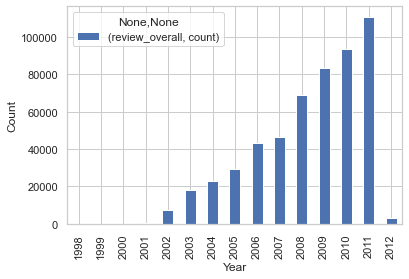

In [56]:
df1[['review_overall','year']].groupby(['year']).agg(['count']).plot.bar()
plt.xlabel('Year')
plt.ylabel('Count')

Ans 2) Here by considering overall review given by people in each year we have following result.







      In year 2011 people gave highest reviews which is nearly 100000

# Question 3.	Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

There are two ways to answer this question which are as followig.


1) By Correlation plot




2) By creating Linera Model


   I'm trying both ways here,

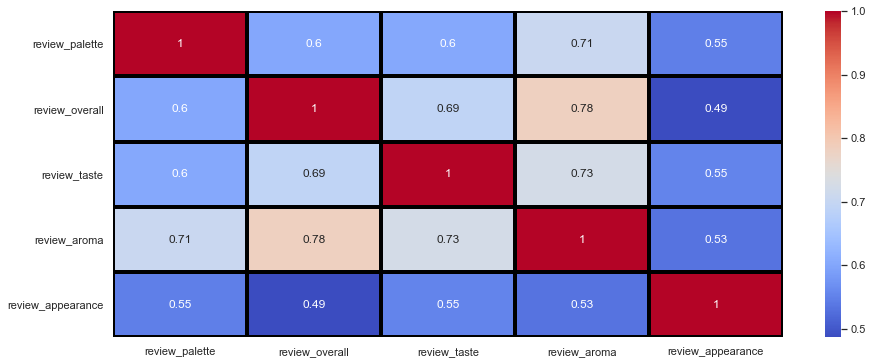

In [57]:
plt.figure(figsize=(15,6))
f=df1[['review_palette','review_overall','review_taste','review_aroma','review_appearance']].corr()
sns.heatmap(f,cmap='coolwarm',linecolor='black',linewidth=3,annot=True)

Ans 3) By Correlation plot following are the results of above graph



       1) aroma has higher correlation with overall rating
       
       
       2) appearance has lower correaltion with oveall rating 

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
X=df1[['review_appearance','review_aroma','review_taste','review_palette']]
y=df1['review_overall']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [62]:
Lr=LinearRegression()

In [63]:
Lr.fit(X_train,y_train)

LinearRegression()

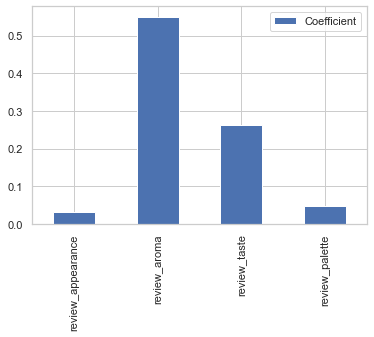

In [64]:
coeff_df = pd.DataFrame(Lr.coef_,X.columns,columns=['Coefficient'])
coeff_df.plot.bar()

Ans 3) By Linear Model

    Coefficient of aroma is nearly .55 which means oveall rating is highly dependent on aroma. Taste comes 2nd then  palette and last appearance of beer.

# Question 4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

There are two ways to answer this question


1) With the help of Recommendation engine


2) With the help of Aggeragate functions.

   I will answer this question with 2nd way

In [65]:
Recommend= df1[['beer_name','review_overall']]\
    .pivot_table(index="beer_name", aggfunc=('count','mean'))\
    .dropna()

In [66]:
Recommend.columns = Recommend.columns.to_series().str.join('_')
Recommend.reset_index(inplace=True)

In [67]:
Recommend= Recommend.query('review_overall_count >= 1000')\
  .sort_values('review_overall_mean',ascending=False)\
  .head(3)

In [68]:
Recommend

,beer_name,review_overall_count,review_overall_mean
6199,Founders KBS (Kentucky Breakfast Stout),1932,4.397516
16870,Tröegs Nugget Nectar,1955,4.395652
6145,Founders Breakfast Stout,2502,4.354516


Ans 4) Here I'm considering mean of overall ratings as a deciding factor for my personal recommendation.

     1) 1st recommendation would be Founders KBS(Kentucky Breakfast Stout)
     2) 2nd recommendation would be Tröegs Nugget Nectar
     3) 3rd recommendation would be Founders Breakfast Stout	

# Question 5. Which Beer style seems to be the favorite based on reviews     written by users? 

There are many ways to solve this question but i will answer this question by Sentiment Analysis.But in Sentiment Analysis there are two methods 




 1) Text blob Method
 
 2) Vader Method
 
 I will prefer Vader Method

In [70]:
# For this analysis i need to import some of the libraries

In [71]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [73]:
df1.drop(['Converted review_time','beer_beerId','beer_brewerId','review_appearance','review_palette','review_taste','review_aroma'],axis=1,inplace=True)

In [74]:
#dropping some columns

In [75]:
df1["review_text"] = df1['review_text'].str.replace('[^\w\s]','')

In [76]:
#Removing punctuation marks in review_text column

In [77]:
df1['review_text']=df1['review_text'].astype(str)

In [78]:
analyzer = SentimentIntensityAnalyzer()

In [79]:
df1['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df1['review_text']]
df1['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df1['review_text']]
df1['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df1['review_text']]
df1['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df1['review_text']]

Here i have created some new columns like Comopound,neg,neu and pos. but what are these columns i will explain you,
    
    
  1)Compound column represents the overall score, higher the score is, higher your goodness of review will be
  
  2)pos column represents positive score of review
  
  3)neu column represents neutarl score of review

  4)neg column represents negative score of review

In [80]:
df1.sort_values('compound',ascending=False)

,beer_ABV,beer_name,beer_style,review_overall,review_profileName,review_text,year,compound,neg,neu,pos
472823,11.1,Blithering Idiot,English Barleywine,4.5,Crosling,Very rich and vibrant aroma which hints of bra...,2006,0.9999,0.000,0.177,0.823
80989,5.0,Sierra Nevada Summerfest Lager,Czech Pilsener,3.5,philbertk,Sierra Nevada Brewing Company Summerfest Beer1...,2011,0.9998,0.019,0.637,0.343
319238,5.5,Samuel Adams Winter Lager,Bock,4.0,philbertk,1998 694 ABV 35 50 Dark Red amber color Mediu...,2010,0.9998,0.009,0.679,0.312
77599,9.6,Sierra Nevada Bigfoot Barleywine Style Ale,American Barleywine,4.5,Wasatch,2009 Edition 15 Years On This Bottle Revisted ...,2006,0.9998,0.018,0.651,0.331
101959,6.5,Hale's O'Brien's Harvest Ale,American Pale Ale (APA),4.5,philbertk,1999 12 oz Bottle 600 ABV 40 50 Oktoberfest P...,2010,0.9997,0.010,0.700,0.290
...,...,...,...,...,...,...,...,...,...,...,...
349527,4.2,Coors Light,Light Lager,1.5,PatronWizard,Had a visitor who wanted this wifes side of th...,2009,-0.9943,0.289,0.651,0.060
279303,5.0,Atwater Rost,American Amber / Red Ale,2.0,BuckeyeNation,Lightly speckled tangerine with a beige cap th...,2007,-0.9948,0.192,0.754,0.054
316529,5.9,Samuel Adams Cranberry Lambic,Fruit / Vegetable Beer,1.0,SamN,Of course this is not a real American Lambic f...,2010,-0.9952,0.301,0.627,0.072
316023,5.9,Samuel Adams Cranberry Lambic,Fruit / Vegetable Beer,1.0,becktone,From notes 112208 Eye All in all this brew loo...,2009,-0.9964,0.169,0.720,0.111


In [81]:
# Sorting Compound score in descending order

In [82]:
Result=df1[['beer_style','compound']].groupby('beer_style').mean().sort_values('compound',ascending=False)

In [83]:
Result.head().plot

,compound
beer_style,
Braggot,0.856733
Quadrupel (Quad),0.855314
Dortmunder / Export Lager,0.849164
Flanders Red Ale,0.849022
American Double / Imperial Stout,0.846893


Ans 5) Here i'm considering mean compound score as a deciding factor for most favorite beer style we have following result.

        1)I'm considering top 5 beer style with highest mean compound score
        2)Braggot is the most favourite beer style with mean compound score of .8567
        3)Quadrupel (Quad) is the 2nd most favorite beer style
        4)Dortmunder/Export Lager is the 3rd most favorite beer style

# Question 6.	How does written review compare to overall review score for the beer styles?

Here i'm trying to compare mean compound score with mean overall review of beer styles

In [84]:
Result2=df1[['beer_style','compound','review_overall']].groupby('beer_style').mean().sort_values('compound',ascending=False)

In [85]:
Result2

,compound,review_overall
beer_style,,
Braggot,0.856733,3.645729
Quadrupel (Quad),0.855314,4.049250
Dortmunder / Export Lager,0.849164,4.051962
Flanders Red Ale,0.849022,3.962561
American Double / Imperial Stout,0.846893,4.100518
...,...,...
Happoshu,0.530362,2.818182
Japanese Rice Lager,0.519884,3.032258
American Malt Liquor,0.519726,2.722183


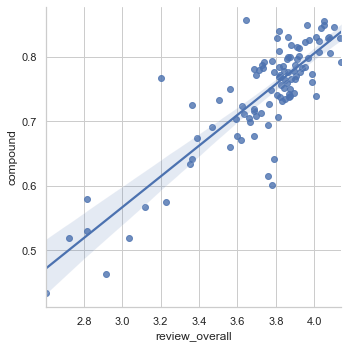

In [93]:
sns.lmplot(x='review_overall',y='compound',data=Result2)

Ans 6) We can see a linear relationship between overall review and compound score.





        In a way we can say that written reviews are linearly related to overall score.
        
        
        That means people are rating beer styles  based on their reviews on the products.